In [1]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

import pandas_datareader as pdr

In [102]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,12,30)
#ibm = pdr.get_data_yahoo(symbols='A2A.MI', start=start, end=end)
ibm = yf.download('^BIT40N', start, end)['Close']
ibm

[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^ITDOW: No data found for this date range, symbol may be delisted


Series([], Name: Close, dtype: float64)

# 1.	Собрать данные по дневным ценам активов (акций) и дневным объемам продаж на заданном фондовом рынке за указанный период. Добавить (если нет) данные по индексу рынка. Можно использовать yahoo finance.

In [25]:
start = datetime.datetime(2017,1,1)
end = datetime.datetime(2017,6,1)
ticker_list = []

with open("Titles.txt", "r") as f:
    for line in f:
        ticker_list.append(line[:-1]+".MI")

In [26]:
ticker_list[:5]

['A2A.MI', 'ABT.MI', 'ACE.MI', 'AED.MI', 'AEF.MI']

In [27]:
data = pd.DataFrame(columns=ticker_list)
for ticker in ticker_list:
  data[ticker] = yf.download(ticker, start, end)['Close']
  if data[ticker][0] is np.nan:
    data[ticker] = yf.download(ticker[:-2], start, end)['Close']
  #ibm = pdr.get_data_yahoo(symbols=ticker, start=start, end=end)
data = data.dropna(axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- AED.MI: Data doesn't exist for startDate = 1483225200, endDate = 1496268000
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALW.MI: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ALK.MI: Data doesn't exist for startDate = 1483225200, endDate = 1496268000
[*********************100%***********************]  1 of 1 completed
[*********************100%

In [28]:
data.head(10)

,A2A.MI,ABT.MI,ACE.MI,AEF.MI,ADB.MI,ARN.MI,AMP.MI,ANIM.MI,ASC.MI,ATL.MI,...,CPR.MI,CMB.MI,CEM.MI,CLI.MI,CIA.MI,CIR.MI,CLE.MI,CNHI.MI,CNF.MI,CE.MI
Date,,,,,,,,,,,,,,,,,,,,,
2017-01-02 00:00:00+01:00,1.262,2.329,11.60,1.190,10.29,2.914,9.200,4.917725,2.766,22.760000,...,4.6800,13.97,4.420,3.266,0.1668,0.385431,0.3750,8.370,0.2499,5.785
2017-01-03 00:00:00+01:00,1.261,2.329,11.58,1.182,10.49,2.902,9.000,4.955626,2.820,22.480000,...,4.6300,14.03,4.498,3.182,0.1768,0.389930,0.4250,8.320,0.2760,5.875
2017-01-04 00:00:00+01:00,1.269,2.300,11.75,1.180,10.77,2.908,9.060,4.984052,2.786,22.410000,...,4.6500,14.22,4.432,3.124,0.1792,0.392929,0.4400,8.210,0.2697,5.900
2017-01-05 00:00:00+01:00,1.265,2.300,11.70,1.173,10.65,2.904,9.060,5.197249,2.750,22.320000,...,4.6600,14.30,4.432,3.070,0.1792,0.407227,0.4215,8.455,0.2695,5.875
2017-01-06 00:00:00+01:00,1.256,2.302,11.70,1.188,10.63,2.930,9.000,5.159347,2.744,22.299999,...,4.6550,14.40,4.390,3.070,0.1834,0.417825,0.4070,8.460,0.2705,5.900
2017-01-09 00:00:00+01:00,1.241,2.307,11.60,1.164,10.68,2.902,8.945,5.116708,2.710,22.389999,...,4.6100,14.40,4.362,3.020,0.1870,0.409926,0.3970,8.285,0.2734,5.680
2017-01-10 00:00:00+01:00,1.235,2.307,11.59,1.147,10.66,2.900,8.900,5.145134,2.710,22.370001,...,4.6550,14.92,4.326,3.000,0.1870,0.412626,0.3896,8.470,0.2723,5.730
2017-01-11 00:00:00+01:00,1.256,2.307,11.53,1.213,10.86,2.900,8.795,5.268314,2.722,22.200001,...,4.6875,14.60,4.420,3.148,0.1896,0.403927,0.4020,8.440,0.2605,5.665
2017-01-12 00:00:00+01:00,1.273,2.300,11.65,1.182,10.84,2.850,8.745,5.201986,2.720,22.070000,...,4.6100,14.68,4.530,3.060,0.1900,0.402128,0.4000,8.325,0.2481,5.620


### Мы взяли за индекс рынка "Италия 40" с сайта investing.com

In [23]:
index_r = pd.read_csv("Italia_40.csv", index_col="Дата")
index_r = index_r.drop('Цена', axis=1)
index_r = index_r.drop('Макс.', axis=1)
index_r = index_r.drop('Мин.', axis=1)
index_r = index_r.drop('Объём', axis=1)
index_r = index_r.drop('Изм. %', axis=1)
index_r = index_r.reindex(index=index_r.index[::-1])
index_r["Откр."] = index_r["Откр."].apply(lambda x: x.replace(".", "").replace(",", "."))
index_r["Откр."] = pd.to_numeric(index_r["Откр."])
index_r.head()

,Откр.
Дата,
02.01.2017,1874.0
03.01.2017,1924.1
04.01.2017,1920.9
05.01.2017,1910.2
06.01.2017,1919.5


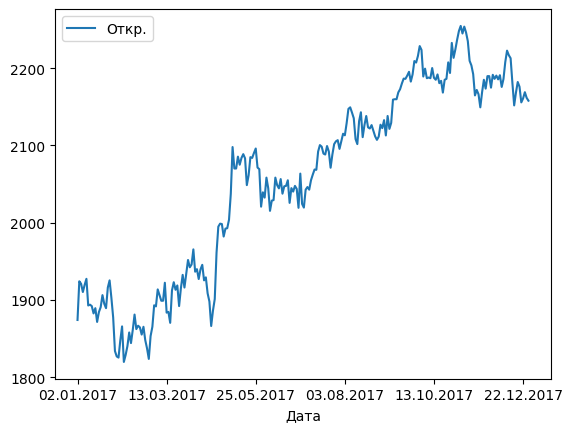

<Figure size 1000x1000 with 0 Axes>

In [24]:
index_r.plot()
plt.figure(figsize=(10, 10))
plt.show()

# 2.	Преобразовать данные по ценам в данные по доходностям (используйте логарифмическую доходность). Вычислите оценки ожидаемых доходностей и стандартных отклонений и постройте «карту» активов в системе координат (σ, E). 

Высчисляем логарифмическую доходность и риск активов

In [33]:
N = len(list(data))
n = data.shape[0] - 1
prices = data.values
prices = prices.transpose()
buffer = np.empty((N, n))
for i in range (N):
  for j in range (n):
    buffer[i][j] = math.log(prices[i][j+1]/prices[i][j])
means = np.empty(N)
vars = np.empty(N)
for i in range(N):
  means[i] = statistics.mean(buffer[i])
  vars[i] = math.sqrt(statistics.variance(buffer[i]))

Вычислим также эти параметры для индекса рынка

In [34]:
index_r_price = index_r.values.flatten()
index_r_buffer = np.empty(n-2)
for i in range(n-2):
  index_r_buffer[i] = math.log(index_r_price[i+1]/index_r_price[i])
index_r_mean = statistics.mean(index_r_buffer)
index_r_var = math.sqrt(statistics.variance(index_r_buffer))

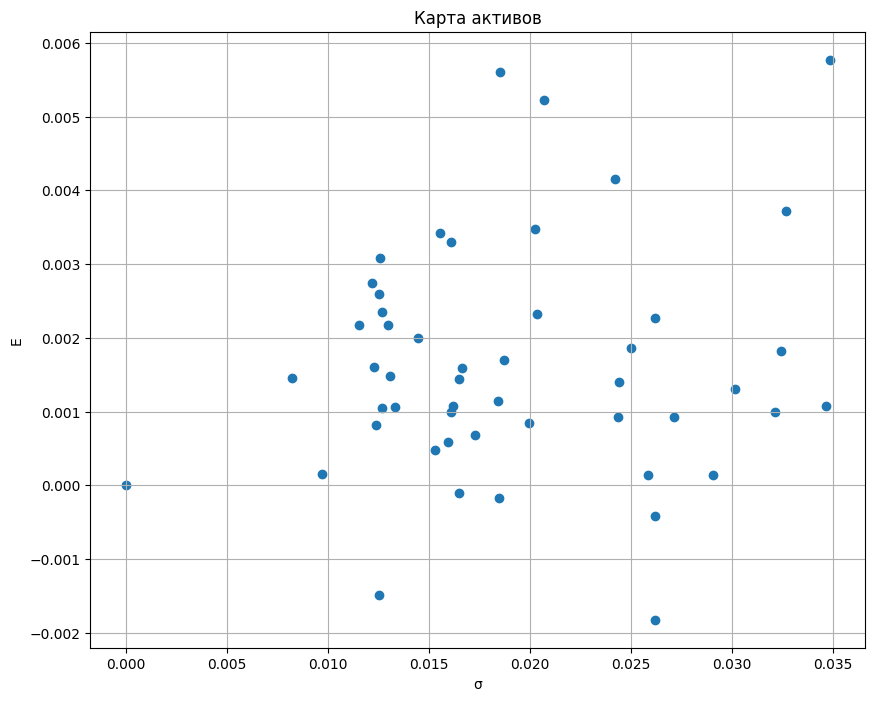

In [36]:
plt.figure(figsize=(10, 8))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов")
plt.scatter(vars, means)
plt.show()

# 3.	Рассмотрите портфель с равными долями капитала и отметьте его на карте активов в системе координат   (σ, E).  Дайте характеристику этому портфелю.

In [39]:
cov = np.cov(buffer)
mean_balanced = np.mean(means)
var_balanced = math.sqrt(np.sum(cov) / (cov.shape[0] ** 2))

print(f"Доходность сбалансированного портфеля Е - {mean_balanced}")
print(f"Риск сбалансированного портфеля       σ - {var_balanced}")

Доходность сбалансированного портфеля Е - 0.0016227435703128636
Риск сбалансированного портфеля       σ - 0.00733041313793796


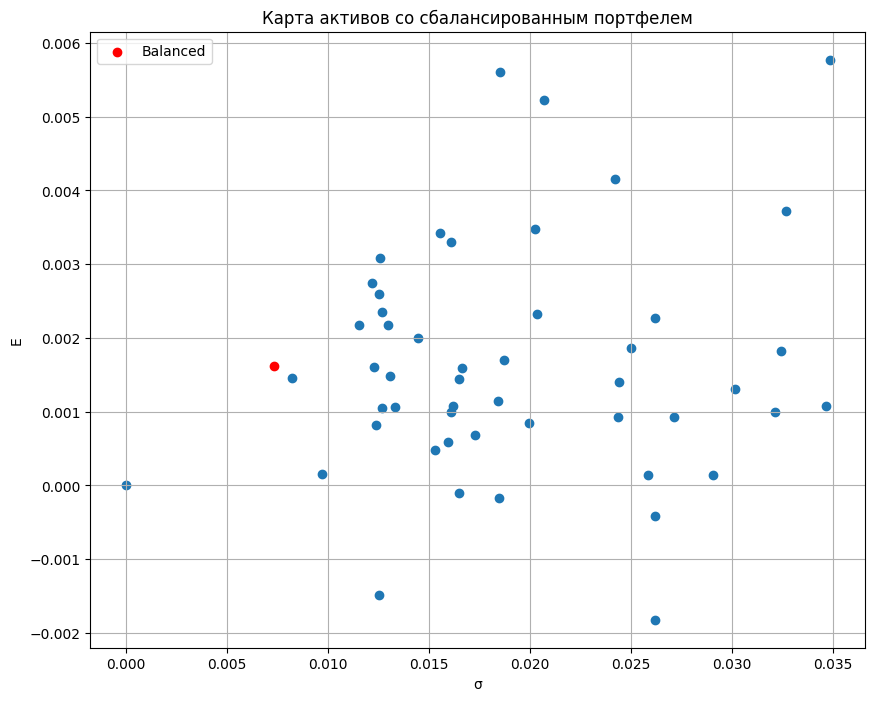

In [45]:
plt.figure(figsize=(10, 8))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов со сбалансированным портфелем")
plt.scatter(vars, means)
plt.scatter(var_balanced, mean_balanced, color='red', label="Balanced")
plt.legend()
plt.show()

# 4.	Рассмотрите индекс рынка и отметьте его на карте активов в системе координат   (σ,E). Дайте характеристику индексу рынка.  

In [47]:
print(f"Доходность индекса рынка Е - {index_r_mean}")
print(f"Риск индекса рынка       σ - {index_r_var}")

Доходность индекса рынка Е - 0.0009719137452884036
Риск индекса рынка       σ - 0.010492183980472188


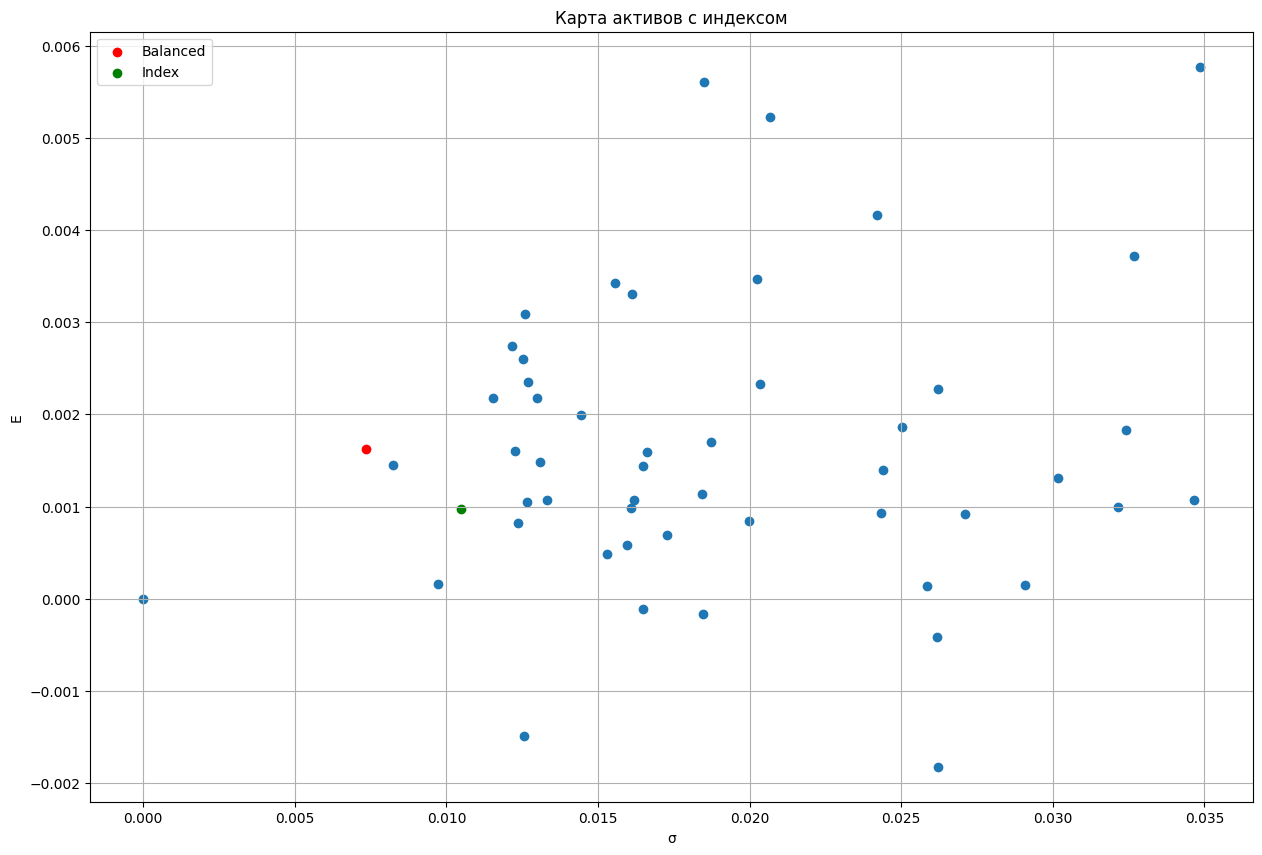

In [48]:
plt.figure(figsize=(15, 10))
plt.xlabel('σ')
plt.ylabel('E')
plt.grid(True)
plt.title("Карта активов с индексом")
plt.scatter(vars, means)
plt.scatter(var_balanced, mean_balanced,color='red', label="Balanced")
plt.scatter(index_r_var, index_r_mean, color='green', label="Index")
plt.legend()
plt.show()